## Ames Feature Engineering and data cleansing

In [37]:
import pandas as pd
import numpy as np
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#Setting for pandas to show all columns
pd.set_option('display.max_columns', None)

#### Read data and merge train and test

In [140]:
#We read the data and create a Data Frame with the whole dataset

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#I prefer to keep teh Id to make sure I dont have any mistakes

y_train = train[['Id', 'SalePrice']]
X_train = train.drop('SalePrice', axis=1)
#copy of our test data in order ot recover thes dataset
X_test = test.copy()

all_data = pd.concat([X_train, X_test], ignore_index=True)
#all_data.info()

In [136]:
#Inspect which columns have null values

pd.DataFrame(all_data.isnull().sum().sort_values(ascending=False), columns = ['Number of Null']).head(20)

,Number of Null
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
FireplaceQu,1420
LotFrontage,486
GarageCond,159
GarageYrBlt,159
GarageFinish,159
GarageQual,159


#### Adressing null values

We impute 'Unavaiblable' to all text columns with null values and 0 to all the numeric ones.

Imputing 0 to all numeric variables with NA is somthing needs to be done with care since can carry some undesired side effects, since we are actually changing the distribution of the data, means and mendians. In this particualr cases and after datra inspection we see that actually the columns most affected seem to be of very low importance so this shoulndt affect too much.

In [137]:
#Lets address first the LotFrontage issue imputing the median of each neighborghood as the better approach

all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [139]:
#Impute value 0 to the numeric columns and unavailable to the object ones

for c in all_data.columns:
    if all_data[c].dtype == 'object':
        all_data[c] = all_data[c].fillna('Unavailable')
    else:
        all_data[c] = all_data[c].fillna(0)       
            

#all_data.isnull().sum().sort_values(ascending=False)

all_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Cluster_Neighborhood
0,1,60,RL,65.0,8450,Pave,Unavailable,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Unavailable,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Unavailable,Unavailable,Unavailable,0,2,2008,WD,Normal,4
1,2,20,RL,80.0,9600,Pave,Unavailable,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Unavailable,Unavailable,Unavailable,0,5,2007,WD,Normal,3
2,3,60,RL,68.0,11250,Pave,Unavailable,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Unavailable,Unavailable,Unavailable,0,9,2008,WD,Normal,4
3,4,70,RL,60.0,9550,Pave,Unavailable,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Unavailable,Unavailable,Unavailable,0,2,2006,WD,Abnorml,2
4,5,60,RL,84.0,14260,Pave,Unavailable,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Unavailable,Unavailable,Unavailable,0,12,2008,WD,Normal,5


#### Factorizing

We categorize the columns that although being numeric represent categories. This way we avoid classification methods like trees to give strange results, i.e: an Overall Quality of 4.5 means actually not much in this context. 

We evaluated which columns needed to be changed and transformed to categories.

In [42]:
#Creating categoriesof  numeric columns that are actually categories

#MSSubClass
#OverallQual
#OverallCond
#GarageCars
#YrSold

all_data["MSSubClass"]= all_data["MSSubClass"].astype('category')
all_data["OverallQual"]= all_data["OverallQual"].astype('category')
all_data["OverallCond"]= all_data["OverallCond"].astype('category')
all_data["GarageCars"]= all_data["GarageCars"].astype('category')
all_data["YrSold"]= all_data["YrSold"].astype('category')

#Chekcing trnasformation has been done correctly
all_data.dtypes.head(10)

Id                int64
MSSubClass     category
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
dtype: object

### Feature engineering

After assessing some of the variables we believe that some of them can be combined and this way affect in a greater proportion to the Sale Price than not as separated ones. Therefore we combine this.

Also there are cases that what affects more the price is the fact that there is a binary classification, tehre is Pool yes or no for example than not the actual characteristics fo the pool or Fireplace. 

In [43]:
#Lets feature engineeer two variables from numerical ones to Yes/No
#We are interested in finding out if we have pool or not, if we have fireplace or not

all_data['Fireplaces'] = np.where(all_data['Fireplaces'] == 0, 'No', 'Yes')

all_data.Fireplaces.value_counts()

Yes    1499
No     1420
Name: Fireplaces, dtype: int64

In [44]:
#Method 2 to achieve the same purpose this time with the loc function.

all_data['PoolArea'] = all_data['PoolArea'].astype(str)

all_data.loc[all_data.PoolArea!='0','PoolArea'] = 'Yes'
all_data.loc[all_data.PoolArea=='0','PoolArea'] = 'No'

all_data.PoolArea.value_counts()


No     2906
Yes      13
Name: PoolArea, dtype: int64

#### Combine some of the data columns

In [45]:
#We combine all the total sqf in order to have jsut one variable

all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
#and drop the columns
all_data.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF'], inplace=True, axis=1)
#we also drop the GrLiving Area since its pretty similar to total SF
all_data.drop(['GrLivArea'], inplace=True, axis=1)

In [46]:
#Then we do the same for the baths
all_data['TotalBath'] = all_data['BsmtFullBath'] + all_data['FullBath'] + all_data['HalfBath'] + all_data['BsmtHalfBath']
#and drop the columns
all_data.drop(['HalfBath','FullBath','BsmtHalfBath','BsmtFullBath'], inplace=True, axis=1)

In [47]:
#lets aggreagete all teh porchs sf into one

all_data['TotalPorchSF']  = all_data['WoodDeckSF'] + all_data['OpenPorchSF'] + all_data['EnclosedPorch']  + all_data['3SsnPorch'] + all_data['ScreenPorch']
all_data.drop(['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'], inplace=True, axis=1)

In [48]:
#Lets also save this dataset
all_data.to_csv('all_data.csv')
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Cluster_Neighborhood,TotalSF,TotalBath,TotalPorchSF
0,1,60,RL,65.0,8450,Pave,Unavailable,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,GasA,Ex,Y,SBrkr,0,3,1,Gd,8,Typ,No,Unavailable,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,No,Unavailable,Unavailable,Unavailable,0,2,2008,WD,Normal,4,2566.0,4.0,61
1,2,20,RL,80.0,9600,Pave,Unavailable,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,GasA,Ex,Y,SBrkr,0,3,1,TA,6,Typ,Yes,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,No,Unavailable,Unavailable,Unavailable,0,5,2007,WD,Normal,3,2524.0,3.0,298
2,3,60,RL,68.0,11250,Pave,Unavailable,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,GasA,Ex,Y,SBrkr,0,3,1,Gd,6,Typ,Yes,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,No,Unavailable,Unavailable,Unavailable,0,9,2008,WD,Normal,4,2706.0,4.0,42
3,4,70,RL,60.0,9550,Pave,Unavailable,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,GasA,Gd,Y,SBrkr,0,3,1,Gd,7,Typ,Yes,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,No,Unavailable,Unavailable,Unavailable,0,2,2006,WD,Abnorml,2,2473.0,2.0,307
4,5,60,RL,84.0,14260,Pave,Unavailable,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,GasA,Ex,Y,SBrkr,0,4,1,Gd,9,Typ,Yes,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,No,Unavailable,Unavailable,Unavailable,0,12,2008,WD,Normal,5,3343.0,4.0,276


In [49]:
all_data.shape
#Notice we reduced the number of variables to 70

(2919, 71)

**Let's deal with the skewness of the numerical variables**

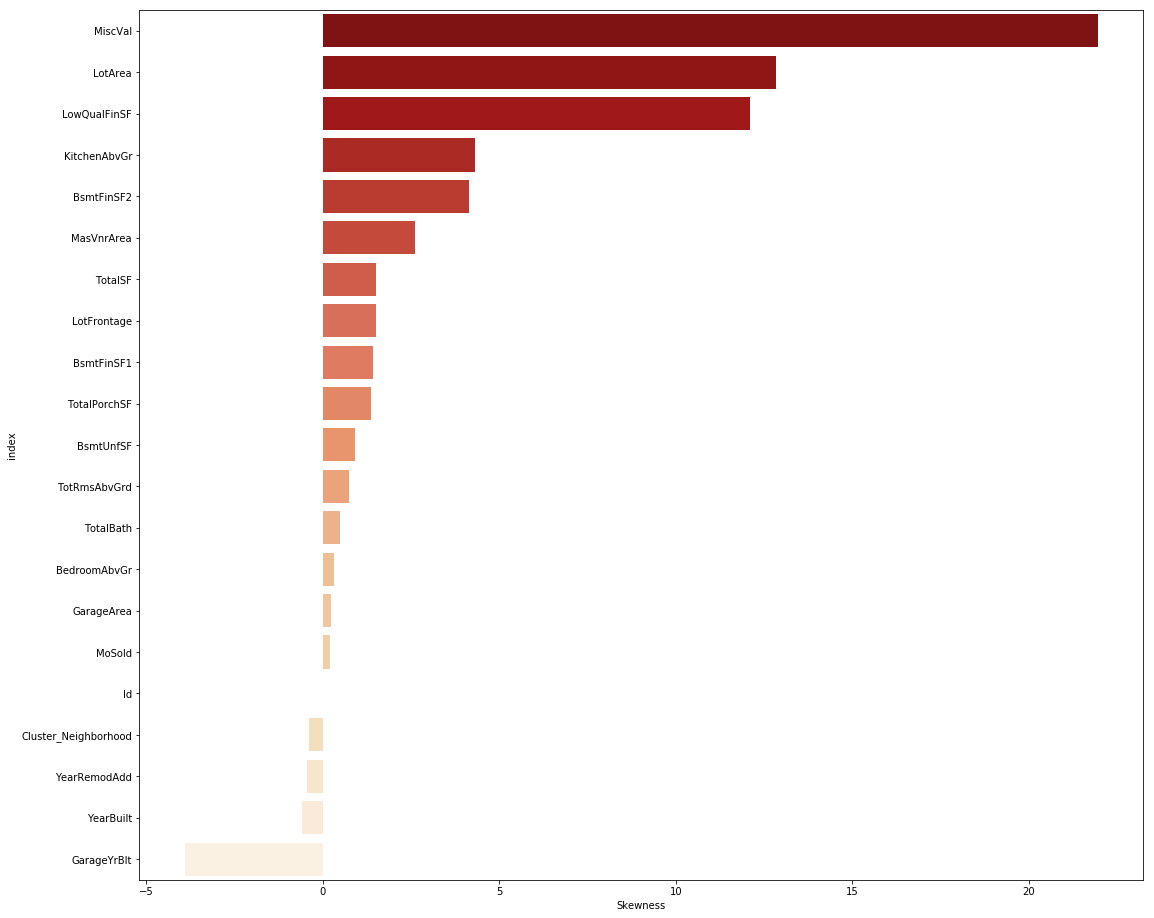

In [50]:
#Skewness of the features, numeric columns only
skew = pd.DataFrame(all_data._get_numeric_data().skew().sort_values(ascending=False), columns=['Skewness']).reset_index()

plt.figure(figsize=(18,16))

#Barplot Graph
ax = sns.barplot(x='Skewness', y='index', data=skew, palette="OrRd_r")

In [51]:
#We selct the skewed columns
skewed_columns= skew.loc[(skew.Skewness>1), ['index']].values.tolist()
#skewed_columns

#And apply the log1p transformation

for col in skewed_columns:
    all_data[col] = all_data[col].apply(np.log1p)

So we are done with the feature engineering, now with this dataset we will do the feature selection but first we will need to transform the categorical variables so our models can be run.

### Categorical variables

We need to work on categorical variables to be able to feed the different models. For this purpose we will be creating two training models so we can fit in linear and tree models. 

- One hot enconder train dataset for linear models
- Label enconder for the tree based algorithms
- Categorical variables in ordinal order

So at the end we will have two sets of data:

    1) With one hot encoder for testing and linear models --> one_hot_all_data

    2) With label and ordinal categoricals for both linear and tree models --> labelenc_all_data

#### One hot enconder

In [52]:
#First we inspect the number of categories, rememeber each category will be a different column
#For all columns of type numeric or integer

for c in all_data.columns:
    if all_data[c].dtype != 'float64' and all_data[c].dtype != 'int64' :
        print(c, len(all_data[c].value_counts()))

#We see some potential problems with columns with a lot of categories

#MSSubClass 16
#Neighborhood 25
#Exterior1st 16
#Exterior2nd 17

MSSubClass 16
MSZoning 6
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 3
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
RoofStyle 6
RoofMatl 8
Exterior1st 16
Exterior2nd 17
MasVnrType 5
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 6
HeatingQC 5
CentralAir 2
Electrical 6
KitchenQual 5
Functional 8
Fireplaces 2
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageCars 6
GarageQual 6
GarageCond 6
PavedDrive 3
PoolArea 2
PoolQC 4
Fence 5
MiscFeature 5
YrSold 5
SaleType 10
SaleCondition 6


In [53]:
#We use one hot enconder to dummify the variables for our linear train dataset. 
one_hot_all_data = pd.get_dummies(all_data, drop_first=True, dummy_na=True)
one_hot_all_data.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,MiscVal,MoSold,Cluster_Neighborhood,TotalSF,TotalBath,TotalPorchSF,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_150.0,MSSubClass_160.0,MSSubClass_180.0,MSSubClass_190.0,MSSubClass_nan,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_Unavailable,MSZoning_nan,Street_Pave,Street_nan,Alley_Pave,Alley_Unavailable,Alley_nan,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,Utilities_NoSeWa,Utilities_Unavailable,Utilities_nan,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,OverallQual_2.0,OverallQual_3.0,OverallQual_4.0,OverallQual_5.0,OverallQual_6.0,OverallQual_7.0,OverallQual_8.0,OverallQual_9.0,OverallQual_10.0,OverallQual_nan,OverallCond_2.0,OverallCond_3.0,OverallCond_4.0,OverallCond_5.0,OverallCond_6.0,OverallCond_7.0,OverallCond_8.0,OverallCond_9.0,OverallCond_nan,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_Unavailable,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Unavailable,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_Unavailable,MasVnrType_nan,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterQual_nan,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterCond_nan,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_Unavailable,BsmtQual_nan,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_Unavailable,BsmtCond_nan,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Unavailable,BsmtExposure_nan,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unavailable,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unavailable,BsmtFinType2_Unf,BsmtFinType2_nan,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,HeatingQC_Fa,HeatingQC_Gd,Heati

In [54]:
one_hot_all_data.shape
#we ahve now way more columns as the shape indicates

(2919, 346)

#### Ordinal Variables

Some variables have numbers which represent ordered categories, such as 5 Excellent and 1 Bad, well treat thtis as numeric in order to facilitate the modelling.

In [55]:
#First we create list with all the columns we wish to change and a dictionary with the values for each variable

#we will be transforming to integer all these columns
ordinal_columns = ['ExterQual', 'ExterCond','BsmtCond','HeatingQC', 'KitchenQual', 
           'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

#we will use these numbers instead of the labels
ord_dict = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, 'Unavailable':0} 

ordinal_enc_all_data = all_data.copy()

for col in ordinal_columns:
    ordinal_enc_all_data[col] = ordinal_enc_all_data[col].map(lambda x: ord_dict.get(x, 0))
ordinal_enc_all_data.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Cluster_Neighborhood,TotalSF,TotalBath,TotalPorchSF
0,1,60,RL,4.189655,9.042040,Pave,Unavailable,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,4,3,PConc,Gd,3,No,GLQ,6.561031,Unf,0.0,150.0,GasA,5,Y,SBrkr,0.0,3,0.693147,4,8,Typ,No,0,Attchd,2003.0,RFn,2.0,548.0,3,3,Y,No,0,Unavailable,Unavailable,0.0,2,2008,WD,Normal,4,7.850493,4.0,4.127134
1,2,20,RL,4.394449,9.169623,Pave,Unavailable,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,3,3,CBlock,Gd,3,Gd,ALQ,6.886532,Unf,0.0,284.0,GasA,5,Y,SBrkr,0.0,3,0.693147,3,6,Typ,Yes,3,Attchd,1976.0,RFn,2.0,460.0,3,3,Y,No,0,Unavailable,Unavailable,0.0,5,2007,WD,Normal,3,7.833996,3.0,5.700444
2,3,60,RL,4.234107,9.328212,Pave,Unavailable,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,4,3,PConc,Gd,3,Mn,GLQ,6.188264,Unf,0.0,434.0,GasA,5,Y,SBrkr,0.0,3,0.693147,4,6,Typ,Yes,3,Attchd,2001.0,RFn,2.0,608.0,3,3,Y,No,0,Unavailable,Unavailable,0.0,9,2008,WD,Normal,4,7.903596,4.0,3.761200
3,4,70,RL,4.110874,9.164401,Pave,Unavailable,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,3,3,BrkTil,TA,4,No,ALQ,5.379897,Unf,0.0,540.0,GasA,4,Y,SBrkr,0.0,3,0.693147,4,7,Typ,Yes,4,Detchd,1998.0,Unf,3.0,642.0,3,3,Y,No,0,Unavailable,Unavailable,0.0,2,2006,WD,Abnorml,2,7.813592,2.0,5.730100
4,5,60,RL,4.442651,9.565284,Pave,Unavailable,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,4,3,PConc,Gd,3,Av,GLQ,6.486161,Unf,0.0,490.0,GasA,5,Y,SBrkr,0.0,4,0.693147,4,9,Typ,Yes,3,Attchd,2000.0,RFn,3.0,836.0,3,3,Y,No,0,Unavailable,Unavailable,0.0,12,2008,WD,Normal,5,8.114923,4.0,5.624018


#### Label encoding

- Give every categorial variable a unique numerical ID
- Useful for non-linear tree-based algorithm
- Does not increase dimensionality

We will build this on top of our ordinal dataframe

In [56]:
from sklearn.preprocessing import LabelEncoder

labelenc_all_data = ordinal_enc_all_data.copy()

#For all columns in our data frame EXCEPT the Id
for c in labelenc_all_data.loc[:,labelenc_all_data.columns != 'Id']:
    #so for all non numerical features 
    if labelenc_all_data[c].dtype != 'float64' and labelenc_all_data[c].dtype != 'int64': 
        le = LabelEncoder()
        # Need to convert the column type to string in order to encode missing values
        labelenc_all_data[c] = le.fit_transform(labelenc_all_data[c].astype(str))
        #print(le.classes_) #this lets you know the actual labels used

#All columns are now integer        
labelenc_all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Cluster_Neighborhood,TotalSF,TotalBath,TotalPorchSF
0,1,10,3,4.189655,9.042040,1,2,3,3,0,4,0,5,2,2,0,5,7,4,2003,2003,1,1,13,14,1,5.283204,4,3,2,2,3,3,2,6.561031,6,0.0,150.0,1,5,1,4,0.0,3,0.693147,4,8,6,0,0,1,2003.0,1,2,548.0,3,3,2,0,0,4,4,0.0,2,2,9,4,4,7.850493,4.0,4.127134
1,2,5,3,4.394449,9.169623,1,2,3,3,0,2,0,24,1,2,0,2,6,7,1976,1976,1,1,8,8,2,0.000000,3,3,1,2,3,1,0,6.886532,6,0.0,284.0,1,5,1,4,0.0,3,0.693147,3,6,6,1,3,1,1976.0,1,2,460.0,3,3,2,0,0,4,4,0.0,5,1,9,4,3,7.833996,3.0,5.700444
2,3,10,3,4.234107,9.328212,1,2,0,3,0,4,0,5,2,2,0,5,7,4,2001,2002,1,1,13,14,1,5.093750,4,3,2,2,3,2,2,6.188264,6,0.0,434.0,1,5,1,4,0.0,3,0.693147,4,6,6,1,3,1,2001.0,1,2,608.0,3,3,2,0,0,4,4,0.0,9,2,9,4,4,7.903596,4.0,3.761200
3,4,11,3,4.110874,9.164401,1,2,0,3,0,0,0,6,2,2,0,5,7,4,1915,1970,1,1,14,16,2,0.000000,3,3,0,3,4,3,0,5.379897,6,0.0,540.0,1,4,1,4,0.0,3,0.693147,4,7,6,1,4,5,1998.0,3,3,642.0,3,3,2,0,0,4,4,0.0,2,0,9,0,2,7.813592,2.0,5.730100
4,5,10,3,4.442651,9.565284,1,2,0,3,0,2,0,15,2,2,0,5,8,4,2000,2000,1,1,13,14,1,5.860786,4,3,2,2,3,0,2,6.486161,6,0.0,490.0,1,5,1,4,0.0,4,0.693147,4,9,6,1,3,1,2000.0,1,3,836.0,3,3,2,0,0,4,4,0.0,12,2,9,4,5,8.114923,4.0,5.624018


#### Redo the train and test dataset for our analysis

Now we have two sets of data for linear and non linear models thta we will be calling:

- x_train_linear
- x_train_tree

The difference will be the method we use for enconding the different variables

In [57]:
####
# For our linear models
####

#Log transformation for the SalePrice data
y_train_linear = np.log1p(train['SalePrice'])

X_train_linear = one_hot_all_data.drop(one_hot_all_data.index[(len(test))+1:], axis=0) #we basically use the len of the test dataset to delete the rows
X_test_linear = one_hot_all_data.drop(one_hot_all_data.index[:(len(test))+1:], axis=0)

print('Shape of X_train_linear: ' + str(X_train_linear.shape))
print('Shape of X_test_linear: ' + str(X_test_linear.shape))
print('Shape of y_train_linear: ' + str(y_train_linear.shape))

####
#For our tree models
####

#y_train

X_train_tree = labelenc_all_data.drop(labelenc_all_data.index[(len(test))+1:], axis=0) #we basically use the len of the test dataset to delete the rows
X_test_tree = labelenc_all_data.drop(labelenc_all_data.index[:(len(test))+1:], axis=0)

print('Shape of X_train_tree: ' + str(X_train_tree.shape))
print('Shape of X_test_tree: ' + str(X_test_tree.shape))


####
##Another method
#train_index = len(X_train)
#X_train = all_data.iloc[:train_index, :]
#X_test = all_data.iloc[train_index:, :]



Shape of X_train_linear: (1460, 346)
Shape of X_test_linear: (1459, 346)
Shape of y_train_linear: (1460,)
Shape of X_train_tree: (1460, 71)
Shape of X_test_tree: (1459, 71)


**We drop IDs and columns we feature engineeried**

Now that I'm 100% sure the order of the data and the Ids match we can drop the Ids



In [58]:
X_train_linear.drop(['Id'], axis=1, inplace=True)
X_test_linear.drop(['Id'], axis=1, inplace=True)
X_train_tree.drop(['Id'], axis=1, inplace=True)
X_test_tree.drop(['Id'], axis=1, inplace=True)
y_train.drop(['Id'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Model Run

Prior to run our models we will assess which varibales have more importance, for that purpose we will use different methodologies and the input train set will also depend on these methodologies. 

**Always** bear in mind that if you do feature selecttion with Lasso you CAN'T use these as features for example a Random Forest. The variables that are important in a linear model do NOT necessarily important in a non linear model. So we can do feature selection with a Linear model for inputs to a linear model and vice versa.

These are:

- Lasso (SelectFromModel)
- Tree (SelectFromModel)

Some extra documentation can be found here: http://scikit-learn.org/stable/modules/feature_selection.html#l1-feature-selection

### Lasso Regression

Libraries for modelling

In [59]:
#General purpose tools

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

#Different models

from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [92]:
lasso_search = Lasso(normalize=True)

#We create a set of parameters for the grid search, from these parameters we will be selecting the best ones for our model
grid_para_lasso = [{'alpha': np.logspace(-4, 2, 100),
                   'tol':np.linspace(start=0.1, stop=1e-10, num=15),
                    }]
                   
grid_search_lasso = GridSearchCV(lasso_search, grid_para_lasso, cv=10) #n_jobs=-1 means will use all Laptop Resources to run the model

%time grid_search_lasso.fit(X_train_linear, y_train_linear)

Wall time: 5min 41s


GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': array([1.00000e-04, 1.14976e-04, ..., 8.69749e+01, 1.00000e+02]), 'tol': array([1.00000e-01, 9.28571e-02, 8.57143e-02, 7.85714e-02, 7.14286e-02,
       6.42857e-02, 5.71429e-02, 5.00000e-02, 4.28571e-02, 3.57143e-02,
       2.85714e-02, 2.14286e-02, 1.42857e-02, 7.14286e-03, 1.00000e-10])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [93]:
#Best parameters for the model
print(grid_search_lasso.best_params_)
#Best scores
print(grid_search_lasso.best_score_)

{'alpha': 0.0001519911082952933, 'tol': 0.04285714291428571}
0.8814016360518271


We apply these best parameters to our best model

In [132]:
#Lets run the model with the best parameters and make the prediction
lasso = Lasso(normalize=True,alpha=0.0001519911082952933, tol=0.04285714291428571)
lasso_model = lasso.fit(X_train_linear, y_train_linear)

###
# Predictions for test and train for CV
###

#note that we do the exp to undo the log function, we did log1p so we use exp1p
lasso_results_train = pd.DataFrame(np.expm1(lasso_model.predict(X_train_linear)), columns=['SalePrice'])
lasso_results = pd.DataFrame(np.expm1(lasso_model.predict(X_test_linear)), columns=['SalePrice'])
lasso_results.to_csv('lasso_cv_results.csv')

#Scores
#print(lasso_model.predict(X_test_linear).score)


**Model performance**

In [131]:
#MSE and RMSE calculations, first we put the TRUE values (the ones calulcated from the predicted model on train data)
rmse_lasso = np.sqrt(mean_squared_error(y_train, lasso_results_train))
print("RMSE: %.0f" % round(rmse_lasso))

RMSE: 25789


In [133]:
importances_lasso = lasso_model.coef_
sorted(list(zip(importances_lasso, X_train_linear.columns.tolist())), key=lambda x: x[0], reverse=True)

[(0.5127049316629341, 'TotalSF'),
 (0.22802084125392066, 'OverallQual_9.0'),
 (0.16876814099211812, 'OverallQual_10.0'),
 (0.14882269577286464, 'Neighborhood_Crawfor'),
 (0.11952140045037687, 'BsmtQual_Unavailable'),
 (0.10485016350078874, 'RoofMatl_WdShngl'),
 (0.0944886146937872, 'OverallQual_8.0'),
 (0.08631524942873557, 'Neighborhood_StoneBr'),
 (0.07812305306558807, 'Neighborhood_NridgHt'),
 (0.07435819056401675, 'OverallCond_9.0'),
 (0.0589232721026423, 'Neighborhood_NoRidge'),
 (0.052896535707867294, 'Neighborhood_Somerst'),
 (0.05276394355095259, 'Exterior1st_BrkFace'),
 (0.049980545425357376, 'Functional_Typ'),
 (0.04947510272762767, 'LotArea'),
 (0.045359110431297714, 'Street_Pave'),
 (0.0427333985903209, 'OverallCond_7.0'),
 (0.04255924364999983, 'TotalBath'),
 (0.04085430082371619, 'CentralAir_Y'),
 (0.03672145337434398, 'Condition1_Norm'),
 (0.03516656996003247, 'SaleType_New'),
 (0.031367796339958585, 'OverallQual_7.0'),
 (0.030682697547403298, 'BsmtExposure_Gd'),
 (0.027

**Let's make a Lasso Graph with the different variables**

We will be using only the numeric variables so the graph its easy to understand.

## LassoCV

In [73]:
lasso_cv_search = LassoCV(normalize=True)

grid_para_lasso_cv = [{'eps': np.linspace(start=0.1, stop=1e-5, num=10),
                    'tol':np.linspace(start=0.1, stop=1e-8, num=10),
                   }]

grid_search_lasso_cv = GridSearchCV(lasso_cv_search, grid_para_lasso_cv, cv=10, n_jobs=3)

%time grid_search_lasso_cv.fit(X_train_linear, y_train_linear)

Wall time: 3min 5s


GridSearchCV(cv=10, error_score='raise',
       estimator=LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid=[{'eps': array([1.000e-01, 8.889e-02, 7.778e-02, 6.667e-02, 5.556e-02, 4.445e-02,
       3.334e-02, 2.223e-02, 1.112e-02, 1.000e-05]), 'tol': array([1.00000e-01, 8.88889e-02, 7.77778e-02, 6.66667e-02, 5.55556e-02,
       4.44445e-02, 3.33333e-02, 2.22222e-02, 1.11111e-02, 1.00000e-08])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [74]:
#Best parameters for the model
print(grid_search_lasso_cv.best_params_)
#Best scores
print(grid_search_lasso_cv.best_score_)

{'eps': 0.011119999999999991, 'tol': 1e-08}
0.8806955857060759


In [78]:
#Lets run the model with the best parameters and make the prediction
lasso_cv = LassoCV(normalize=True,eps = 0.01111, tol=1e-08)
lasso_cv_model = lasso_cv.fit(X_train_linear, y_train_linear)

###
# Predictions for test and train for CV
###

#note that we do the exp to undo the log function
lasso_cv_cv_results_train = pd.DataFrame(np.expm1(lasso_cv_model.predict(X_train_linear)), columns=['SalePrice'])
lasso_cv_cv_results = pd.DataFrame(np.expm1(lasso_cv_model.predict(X_test_linear)), columns=['SalePrice'])
lasso_cv_cv_results.to_csv('lasso_cv_cv_results.csv')

#Scores
print(lasso_cv_model.score)

<bound method RegressorMixin.score of LassoCV(alphas=None, copy_X=True, cv=None, eps=0.01111, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=1e-08,
    verbose=False)>


In [79]:
#MSE and RMSE calculations, first we put the TRUE values (the ones calulcated from the predicted model on train data)
rmse_lasso_cv_cv = np.sqrt(mean_squared_error(y_train, lasso_cv_cv_results_train))
print("RMSE: %.0f" % round(rmse_lasso_cv_cv))

RMSE: 24336


## Elastic Net

Elastic Net its an special type of linear model that takes into account Lasso and Ridge regression, being the tuning parameter a middle ground between L1 and L2 of the mentioned models.


In [80]:
elastic_search = ElasticNet(normalize=True)

grid_para_elastic = [{'alpha': [0.001,0.01,0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75],
                    'l1_ratio': [0.5,0.75,0.85,0.9,0.95,0.99], #we ommit the 1 cos would be same as Lasso
                   'tol':np.linspace(start=0.01, stop=1e-8, num=15),
                   }]

grid_search_elastic = GridSearchCV(elastic_search, grid_para_elastic, cv=10,n_jobs=3)

%time grid_search_elastic.fit(X_train_linear, y_train_linear)

Wall time: 2min 28s


GridSearchCV(cv=10, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid=[{'alpha': [0.001, 0.01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75], 'l1_ratio': [0.5, 0.75, 0.85, 0.9, 0.95, 0.99], 'tol': array([1.00000e-02, 9.28571e-03, 8.57143e-03, 7.85714e-03, 7.14286e-03,
       6.42857e-03, 5.71429e-03, 5.00001e-03, 4.28572e-03, 3.57143e-03,
       2.85715e-03, 2.14286e-03, 1.42858e-03, 7.14295e-04, 1.00000e-08])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [81]:
#Best parameters for the model
print(grid_search_elastic.best_params_)
#Best scores
print(grid_search_elastic.best_score_)

{'alpha': 0.001, 'l1_ratio': 0.5, 'tol': 0.01}
0.8431966394079615


We apply these best parameters to our best model

In [82]:
#Lets run the model with the best parameters and make the prediction
elastic = ElasticNet(normalize=True, alpha=0.001,l1_ratio=0.5,tol=0.01)
elastic_model = elastic.fit(X_train_linear, y_train_linear)

###
# Predictions for test and train for CV
###

#note that we do the exp to undo the log function
elastic_results_train = pd.DataFrame(np.expm1(elastic_model.predict(X_train_linear)), columns=['SalePrice'])
elastic_results = pd.DataFrame(np.expm1(elastic_model.predict(X_test_linear)), columns=['SalePrice'])
elastic_results.to_csv('elastic_cv_results.csv')

#Scores
print(elastic_model.score)

<bound method RegressorMixin.score of ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.01, warm_start=False)>


#### Model performance

In [83]:
#MSE and RMSE calculations, first we put the TRUE values (the ones calulcated from the predicted model on train data)
rmse_elastic = np.sqrt(mean_squared_error(y_train, elastic_results_train))
print("RMSE: %.0f" % round(rmse_elastic))

RMSE: 36514


#### Features selected in the model

In [84]:
importances_elastic = elastic_model.coef_
sorted(list(zip(importances_elastic, X_train_linear.columns.tolist())), key=lambda x: x[0], reverse=True)

[(0.20323942521234473, 'TotalSF'),
 (0.10931319119095102, 'OverallQual_9.0'),
 (0.06880006508984285, 'OverallQual_10.0'),
 (0.05786965624487529, 'GarageCars_3.0'),
 (0.05663498697879426, 'CentralAir_Y'),
 (0.05003701472960229, 'OverallQual_8.0'),
 (0.04741480662689465, 'Neighborhood_Crawfor'),
 (0.0442730797320236, 'LotArea'),
 (0.041077559647469564, 'Neighborhood_NridgHt'),
 (0.03668465560484513, 'TotalBath'),
 (0.03463021846261905, 'Neighborhood_NoRidge'),
 (0.03220866157803842, 'Fireplaces_Yes'),
 (0.031160700441223266, 'BsmtExposure_Gd'),
 (0.031043936733399127, 'Neighborhood_StoneBr'),
 (0.025143446450104252, 'Foundation_PConc'),
 (0.024379136603652388, 'RoofMatl_WdShngl'),
 (0.023194980213130597, 'BsmtFinType1_GLQ'),
 (0.022748128696512975, 'LotFrontage'),
 (0.022285957961523526, 'GarageCond_TA'),
 (0.016604178715480207, 'TotRmsAbvGrd'),
 (0.014279858895396312, 'ExterQual_Gd'),
 (0.01354693480397226, 'PavedDrive_Y'),
 (0.012830048422694014, 'GarageType_Attchd'),
 (0.0127925717016

## ElasticNetCV

In [87]:
elastic_cv_search = ElasticNetCV(normalize=True)

grid_para_elastic_cv = [{'eps':[0.0001, 0.001, 0.01, 0.1], 
                         'tol':[0.0001, 0.001, 0.01, 0.1, 1],
                         'l1_ratio': [0.5,0.75,0.85,0.9,0.95,0.99]
                   }]

grid_search_elastic_cv = GridSearchCV(elastic_cv_search, grid_para_elastic_cv, cv=10,n_jobs=3)

%time grid_search_elastic_cv.fit(X_train_linear, y_train_linear)

Wall time: 4min 56s


GridSearchCV(cv=10, error_score='raise',
       estimator=ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1, normalize=True,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0),
       fit_params=None, iid=True, n_jobs=3,
       param_grid=[{'eps': [0.0001, 0.001, 0.01, 0.1], 'tol': [0.0001, 0.001, 0.01, 0.1, 1], 'l1_ratio': [0.5, 0.75, 0.85, 0.9, 0.95, 0.99]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [88]:
#Best parameters for the model
print(grid_search_elastic_cv.best_params_)
#Best scores
print(grid_search_elastic_cv.best_score_)

{'eps': 0.0001, 'l1_ratio': 0.5, 'tol': 0.1}
0.8816151348079403


In [89]:
#Lets run the model with the best parameters and make the prediction
elastic_cv = ElasticNetCV(normalize=True, eps=0.0001,tol=0.1, l1_ratio=0.5)
elastic_model_cv = elastic_cv.fit(X_train_linear, y_train_linear)

###
# Predictions for test and train for CV
###

#note that we do the exp to undo the log function
elastic_results_train_cv = pd.DataFrame(np.expm1(elastic_model_cv.predict(X_train_linear)), columns=['SalePrice'])
elastic_results_cv = pd.DataFrame(np.expm1(elastic_model_cv.predict(X_test_linear)), columns=['SalePrice'])
elastic_results_cv.to_csv('elastic_cv_results_cv.csv')

#Scores
print(elastic_model.score)

<bound method RegressorMixin.score of ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.01, warm_start=False)>


**Model Performance**

In [90]:
#MSE and RMSE calculations, first we put the TRUE values (the ones calulcated from the predicted model on train data)
rmse_elastic_cv = np.sqrt(mean_squared_error(y_train, elastic_results_train_cv))
print("RMSE: %.0f" % round(rmse_elastic_cv))

RMSE: 24797


## Tree Models

GridSearch plus Importance Selector

#### Random Forest Grid Search

In [91]:
#CAUTION: TAKES LONGv to RUN (>8min)
randomForest = RandomForestRegressor() 

#We create a set of parameters for teh grid search, from these parameters we will be selecting the best ones for our model
grid_para_forest = [{
    'criterion':['mse'],
    'n_estimators': [25, 50, 100,500,1000],
    'min_samples_leaf': range(5, 20),
    'max_features':['log2','sqrt', 'auto'],
    'min_samples_split': np.linspace(start=2, stop=30, num=15, dtype=int),
    }]

#Once parameters are selected we pass them to the model
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, cv=10, n_jobs=3)

#we fit the model
%time grid_search_forest.fit(X_train_tree, y_train)

KeyboardInterrupt: 

In [ ]:
#Best parameters for the model
print(grid_search_forest.best_params_)
#Best scores
print(grid_search_forest.best_score_)

We apply these best parameters to our best model

In [ ]:
#Here we use the parameters set by the GridSearch
forest = RandomForestRegressor(n_estimators=500, #num of trees run
                               max_features = 'sqrt',
                                oob_score=True,
                                min_samples_leaf=5, #minimum number of features in each tree
                               min_samples_split= 8)

#we fit the model
forest_model = forest.fit(X_train_tree, y_train)

####
# Predictions
####
random_forest_results_train = pd.DataFrame(forest_model.predict(X_train_tree), columns=['SalePrice'])
random_forest_results = pd.DataFrame(forest_model.predict(X_test_tree), columns=['SalePrice'])
random_forest_results.to_csv('random_forest_results.csv')

#Scores
print(forest_model.score)

#### Model Performance

Final list of selected features

In [ ]:
#MSE and RMSE calculations, first we put the TRUE values (the ones calulcated from the predicted model on train data)
rmse_random_forest = np.sqrt(mean_squared_error(y_train, random_forest_results_train))
print("RMSE: %.0f" % round(rmse_random_forest))

**Features Selected in this model**

In [ ]:
importances_forest = forest.feature_importances_
importance_forest_features = pd.DataFrame(sorted(list(zip(importances_forest, X_train_tree.columns.tolist())), key=lambda x: x[0], reverse=True), columns=['Importance', 'Features'])
importance_forest_features

In [ ]:
plt.figure(figsize=(14, 12))
ax = sns.barplot(x='Importance', y='Features', data=importance_forest_features, palette="OrRd_r")

Note: Nice package to visualize the results of feature_importances: yellowbrick. http://www.scikit-yb.org/en/latest/api/features/importances.html

Another example: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

## XGBoost

In [ ]:
#CAUTION: TAKES LONGv to RUN (>10min)
XGBoost = XGBRegressor()

#Parameters for XG Boost
grid_para_xgboost = [{
        'min_child_weight': [1,3, 5,7 ,10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6,7],
        }]

#Once parameters are selected we pass them to the model
grid_search_xgboost = GridSearchCV(XGBoost, grid_para_xgboost, cv=10, n_jobs=3)

#we fit the model
%time grid_search_xgboost.fit(X_train_tree, y_train)


In [ ]:
#Best parameters for the model
print(grid_search_xgboost.best_params_)
#Best scores
print(grid_search_xgboost.best_score_)

In [ ]:
#Here we use the parameters set by the GridSearch
xgboost = XGBRegressor(colsample_bytree=0.6,gamma=0.5,max_depth=6,min_child_width=3, subsample=0.8)

#we fit the model
xgboost_model = forest.fit(X_train_tree, y_train)

####
# Predictions
####
xgboost_results_train = pd.DataFrame(xgboost_model.predict(X_train_tree), columns=['SalePrice'])
xgboost_results = pd.DataFrame(xgboost_model.predict(X_test_tree), columns=['SalePrice'])
xgboost_results.to_csv('xgboost_results.csv')



In [ ]:
#MSE and RMSE calculations, first we put the TRUE values (the ones calulcated from the predicted model on train data)
rmse_xgboost = np.sqrt(mean_squared_error(y_train, xgboost_results_train))
print("RMSE: %.0f" % round(rmse_xgboost))

## Playground